In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def run(model):
    print(model)

    # Loading Data
    df = pd.read_csv("undersampled_spam.csv", encoding="latin")
    df = df.dropna()

    # Splitting Data
    features, labels = df["processedSMS"] , df["type"]
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2022, stratify=labels)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=2022, stratify=y_test)

    # Train Model
    pipeline = Pipeline([("vector", TfidfVectorizer()), ("model", model)]).fit(x_train, y_train)

    # Validate Model
    print("Validation Results:")
    y_pred = pipeline.predict(x_val)
    print(classification_report(y_val, y_pred))

    # Test Model
    print("Testing Results:")
    y_pred = pipeline.predict(x_test)
    print(classification_report(y_test, y_pred))

    # More Testing Results
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
    print(f"Recall: {recall_score(y_test, y_pred, zero_division=0)}")
    rc1, rc2, rc3 = precision_recall_curve(y_test, y_pred)
    print(f"PR_AUC: {auc(rc2,  rc1)}")
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1]).plot()
    plt.show()

<p style="text-align: center;">ComplementNB</p>

ComplementNB()
Validation Results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       112
           1       0.98      0.96      0.97       113

    accuracy                           0.97       225
   macro avg       0.97      0.97      0.97       225
weighted avg       0.97      0.97      0.97       225

Testing Results:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       112
           1       0.94      0.98      0.96       112

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.96      0.96      0.96       224

Accuracy: 0.9598214285714286
Precision: 0.9401709401709402
Recall: 0.9821428571428571
PR_AUC: 0.9656211843711844


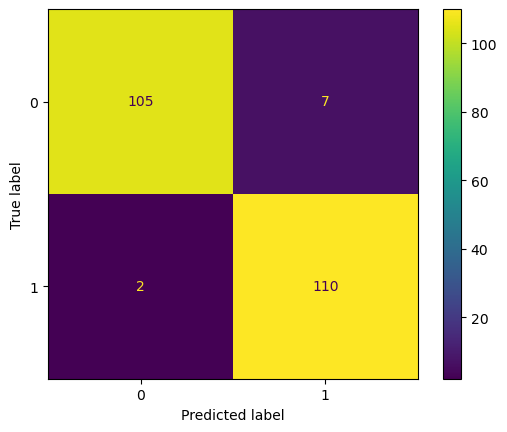

In [3]:
run(ComplementNB())

<p style="text-align: center;">Neural Network</p>

MLPClassifier(max_iter=3000)
Validation Results:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       112
           1       0.97      0.94      0.95       113

    accuracy                           0.96       225
   macro avg       0.96      0.96      0.96       225
weighted avg       0.96      0.96      0.96       225

Testing Results:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       112
           1       0.95      0.97      0.96       112

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.96      0.96      0.96       224

Accuracy: 0.9598214285714286
Precision: 0.9478260869565217
Recall: 0.9732142857142857
PR_AUC: 0.9672166149068323


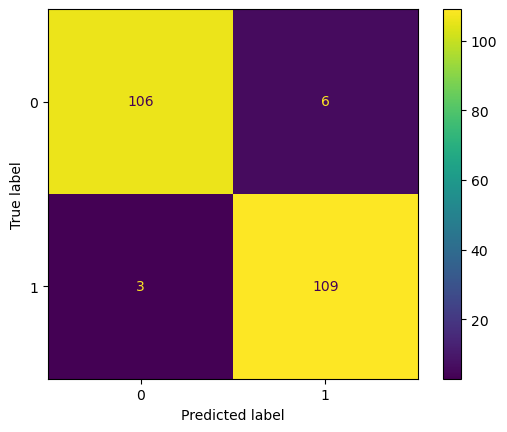

In [4]:
run(MLPClassifier(max_iter=3000))